<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Principal Component Analysis (PCA)</h3>
    <h4 align="center"><a href="https://www.linkedin.com/public-profile/settings?trk=d_flagship3_profile_self_view_public_profile&lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_self_edit_top_card%3BhFw1W2M%2FTMCAYZp6pzKt1Q%3D%3D">Seyed Mohammad Sajadi</a></h4>
</div>

<img src="https://ashutoshtripathicom.files.wordpress.com/2019/07/pca_title-1.jpg" width=80% />

# Principal Component Analysis (PCA)

<img src="https://miro.medium.com/max/2780/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg" width=50% />

where you can apply PCA?

* Data Visualization:

When working on any data related problem, the challenge in today's world is the sheer volume of data, and the variables/features that define that data. To solve a problem where data is the key, you need extensive data exploration like finding out how the variables are correlated or understanding the distribution of a few variables. Considering that there are a large number of variables or dimensions along which the data is distributed, visualization can be a challenge and almost impossible.
Hence, PCA can do that for you since it projects the data into a lower dimension, thereby allowing you to visualize the data in a 2D or 3D space with a naked eye.

* Speeding Machine Learning (ML) Algorithm:

Since PCA's main idea is dimensionality reduction, you can leverage that to speed up your machine learning algorithm's training and testing time considering your data has a lot of features, and the ML algorithm's learning is too slow.


## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Importing the dataset

In [2]:
df = pd.read_csv('iris.csv')
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

<img src="https://miro.medium.com/max/875/1*Qxyo-uDrmsUzdxIe7Nnsmg.png" width=80% />

## Applying PCA

In [5]:
# from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [6]:
maindf = pd.DataFrame(data = X, columns = ['principal component 1', 'principal component 2'])

In [7]:
maindf

,principal component 1,principal component 2
0,-2.501021,0.451868
1,-2.279945,-0.696698
2,-2.559435,-0.383488
3,-2.476060,-0.636243
4,-2.579407,0.611050
...,...,...
145,1.953963,0.391855
146,1.982991,-0.866112
147,1.854045,0.290264
148,1.478182,0.982267


In [8]:
pca.components_

array([[ 0.55318314,  0.51774664, -0.28847469,  0.58541369],
       [ 0.00902118,  0.42093567,  0.90471285,  0.06501105]])

<img src="https://miro.medium.com/max/875/1*7jUCr36YguAMKNHTN4Gt8A.png" width=80% />

In [9]:
pca.explained_variance_

array([2.83122907, 0.92107083])

In [10]:
finaldf = pd.concat([maindf, df[['Species']]], axis = 1)
finaldf

,principal component 1,principal component 2,Species
0,-2.501021,0.451868,Iris-setosa
1,-2.279945,-0.696698,Iris-setosa
2,-2.559435,-0.383488,Iris-setosa
3,-2.476060,-0.636243,Iris-setosa
4,-2.579407,0.611050,Iris-setosa
...,...,...,...
145,1.953963,0.391855,Iris-virginica
146,1.982991,-0.866112,Iris-virginica
147,1.854045,0.290264,Iris-virginica
148,1.478182,0.982267,Iris-virginica


## Visualising the results

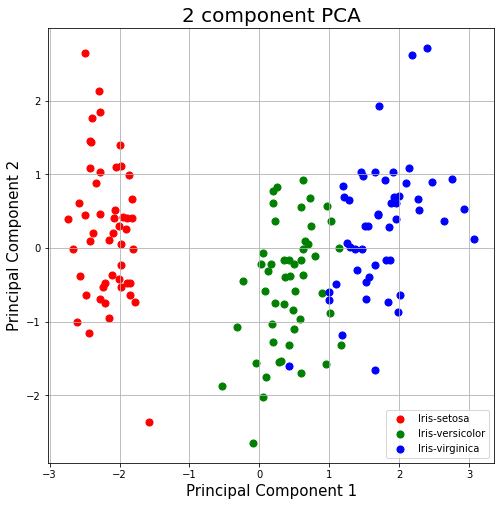

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Species'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'principal component 1']
               , finaldf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()